**1. Importing the dependencies**

In [ ]:
!pip install scikit-learn==1.3.0
!pip install --upgrade xgboost
!pip install -U imbalanced-learn
!pip install tpot  # For TPOT
# Install the module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Restart the kernel after upgrading scikit-learn, then import
import sklearn # Import the main 'sklearn' module
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

print("All imports are working correctly!")
print(sklearn.__version__)


**2. Data Loading and Understanding**

In [ ]:
#load the csv data to a   pandas dataframe
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
print(df['SeniorCitizen'].unique())

[0 1]


In [ ]:
print(df['gender'].unique())

['Female' 'Male']


In [ ]:
print(df['Partner'].unique())

['Yes' 'No']


In [ ]:
# printing the unique values in all the columns
for column in df.columns:
    print(f"Unique values in column '{column}': {df[column].unique()}")

Unique values in column 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'SeniorCitizen': [0 1]
Unique values in column 'Partner': ['Yes' 'No']
Unique values in column 'Dependents': ['No' 'Yes']
Unique values in column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in column 'PhoneService': ['No' 'Yes']
Unique values in column 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in column 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in column 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in column 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in column 'DeviceProtection': ['No' 'Yes' 'No internet serv

In [ ]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [ ]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# checking the class distribution of target column
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


**3. exploratory data analysis(EDA)**

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Numerical Feature-Anlysis

In [ ]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

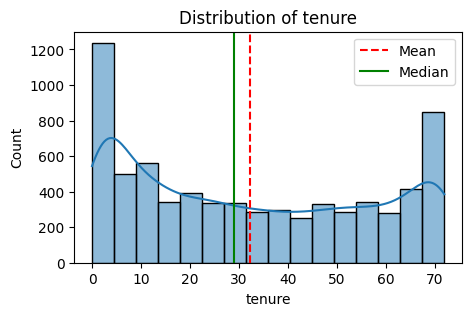

In [ ]:
 # Call the function to create the histogram
 plot_histogram(df, "tenure")

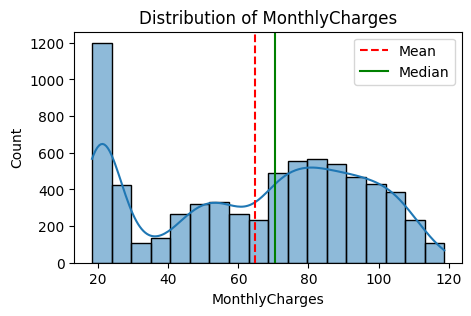

In [ ]:
# Call the function to create the histogram
plot_histogram(df, "MonthlyCharges")

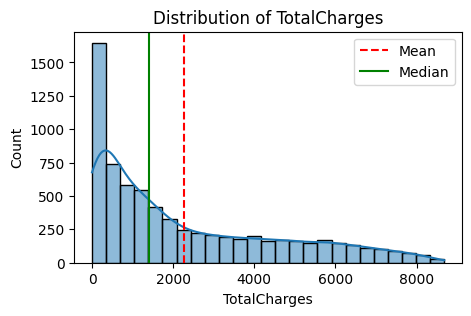

In [ ]:

# Assuming 'df' is your DataFrame
# Replace blank spaces and corrupted entries with "0.0"
df["TotalCharges"] = df["TotalCharges"].apply(lambda x: "0.0" if not str(x).replace('.', '', 1).isdigit() else x)  # Replace any string which is not numeric after removing '.'
# Now convert the column to float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")  # Use 'coerce' to handle errors gracefully
# Call the function to create the histogram
plot_histogram(df, "TotalCharges")

In [ ]:
def plot_boxplot(df, column_name):
    # Indented code block for the function
    plt.figure(figsize=(5, 3))
      # Create a figure with a specific size
    sns.boxplot(y=df[column_name])
     # Create a box plot using Seaborn
    plt.title(f"Box Plot of {column_name}")
      # Set the title of the plot
    plt.show()


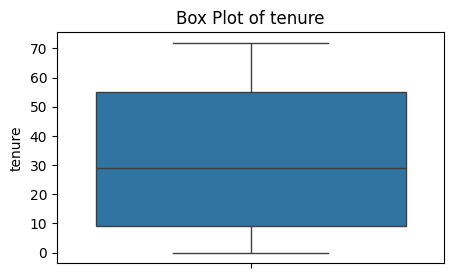

In [ ]:
# Call the function to create the box plot
plot_boxplot(df, "tenure")

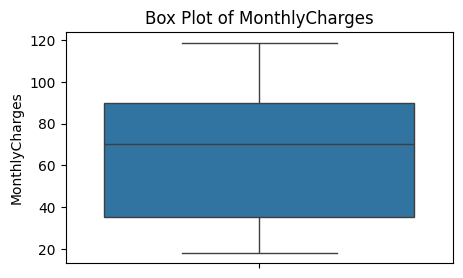

In [ ]:
# Call the function to create the box plot
plot_boxplot(df, "MonthlyCharges")

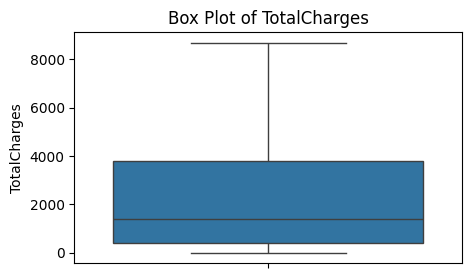

In [ ]:
# Call the function to create the box plot
plot_boxplot(df, "TotalCharges")

Correlation Heatmap for numerical columns

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


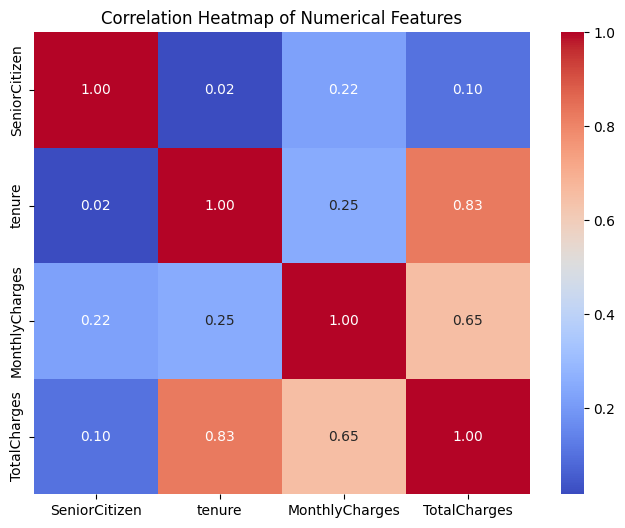

In [ ]:
# Select numerical columns (excluding non-numeric columns)
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
numerical_df = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

cotagorical feature-anlysis

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Countplot for categorical columns

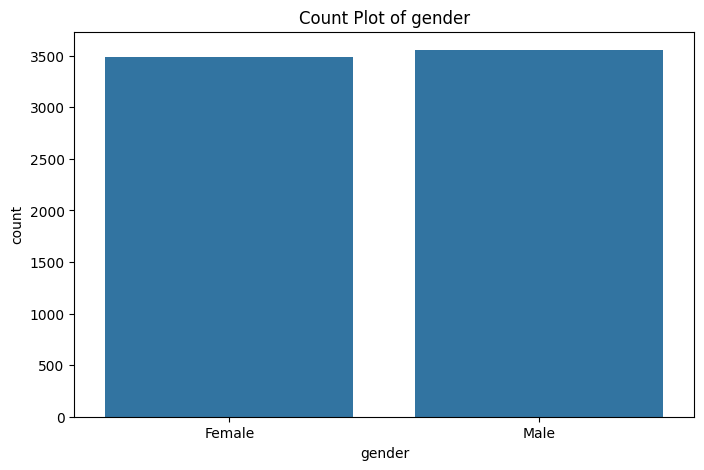

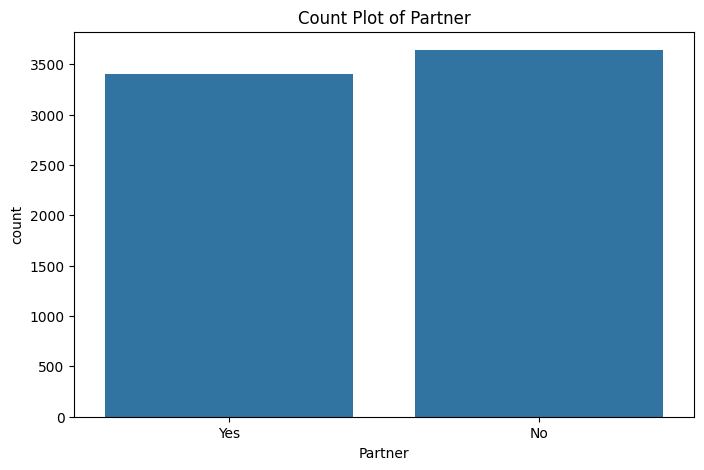

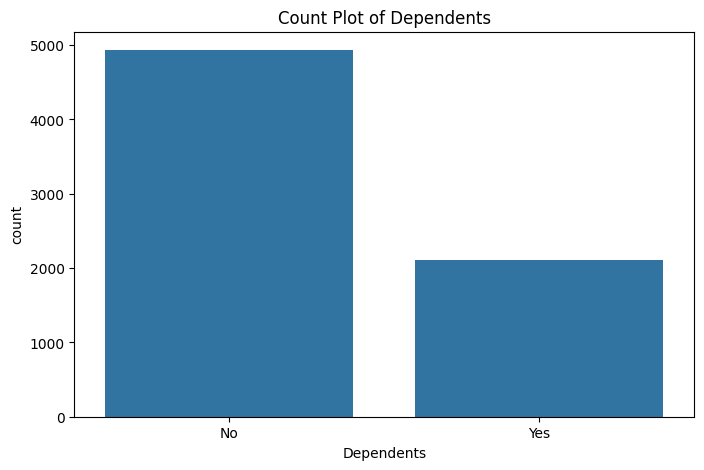

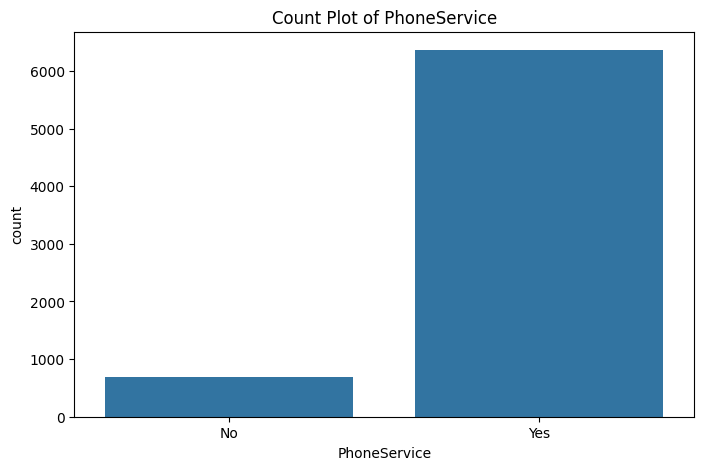

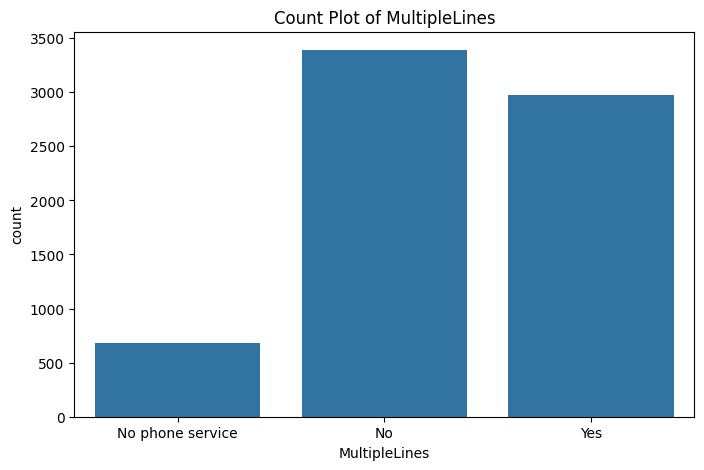

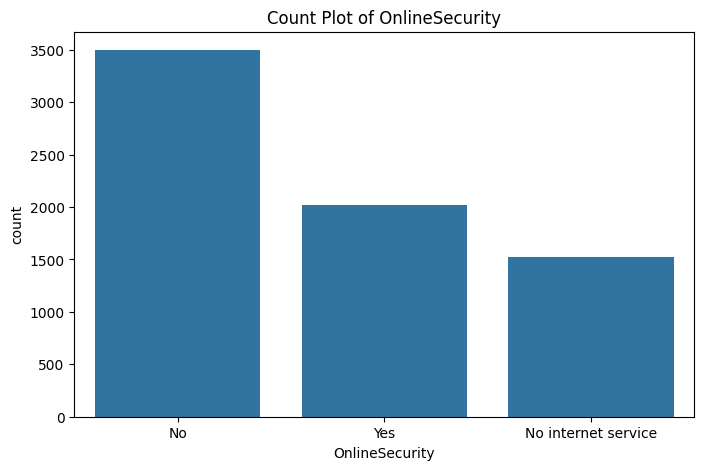

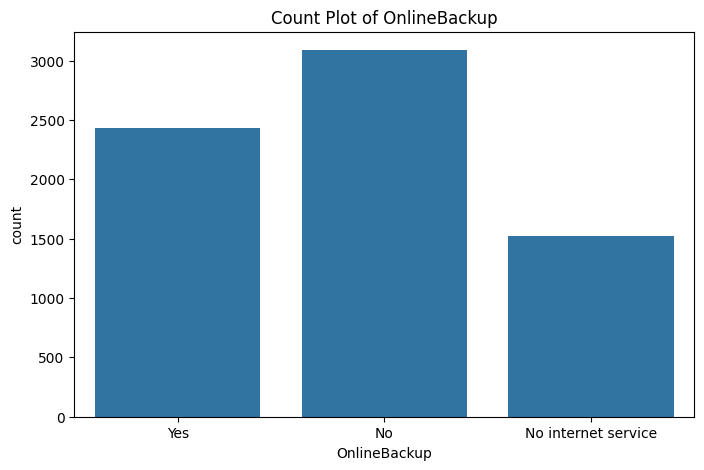

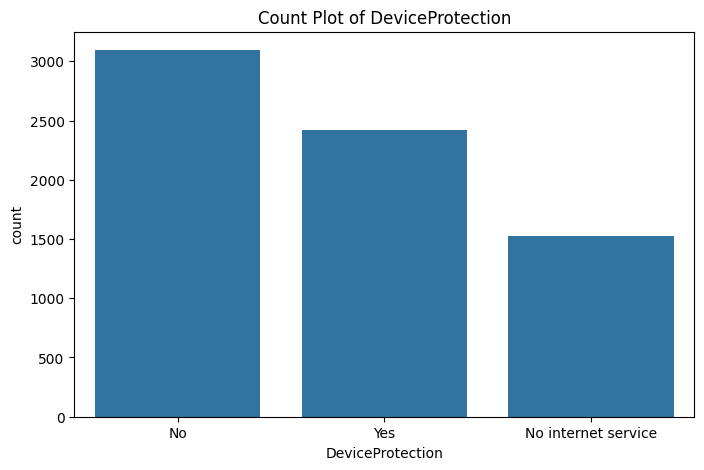

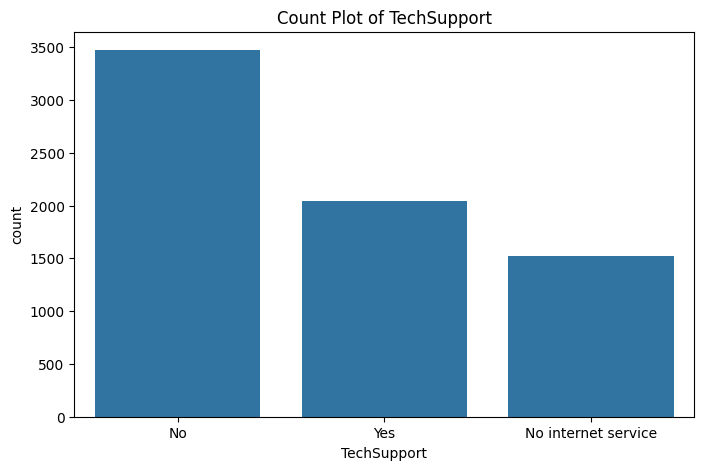

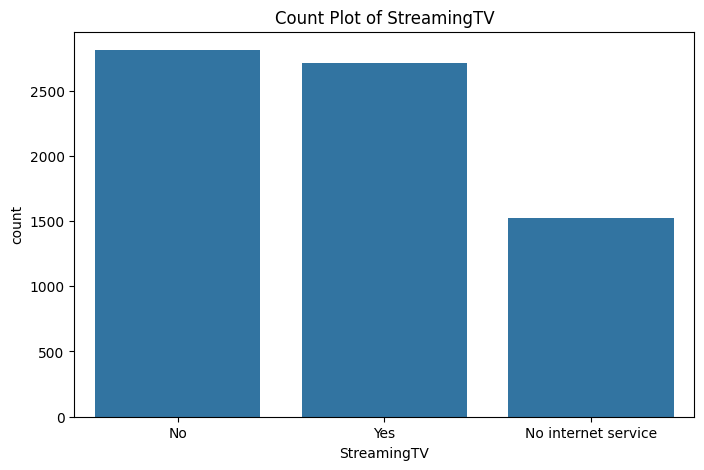

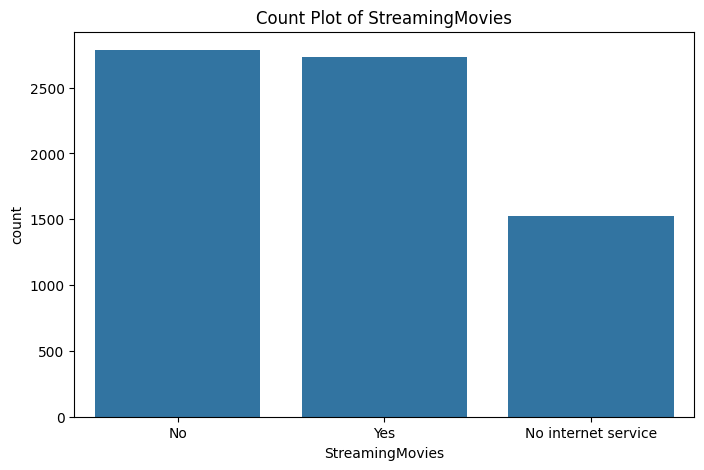

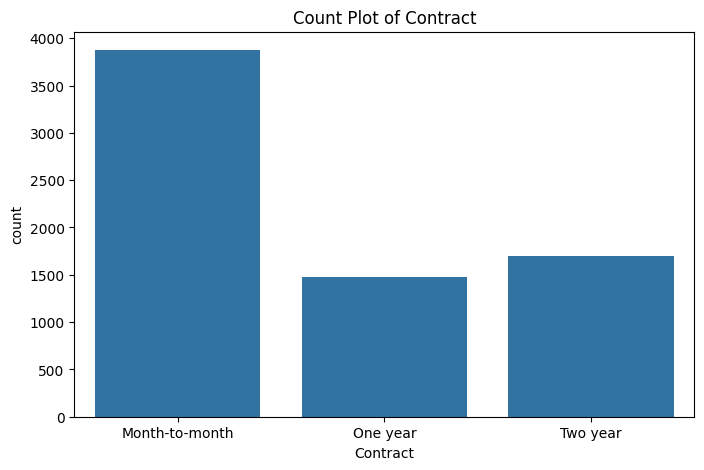

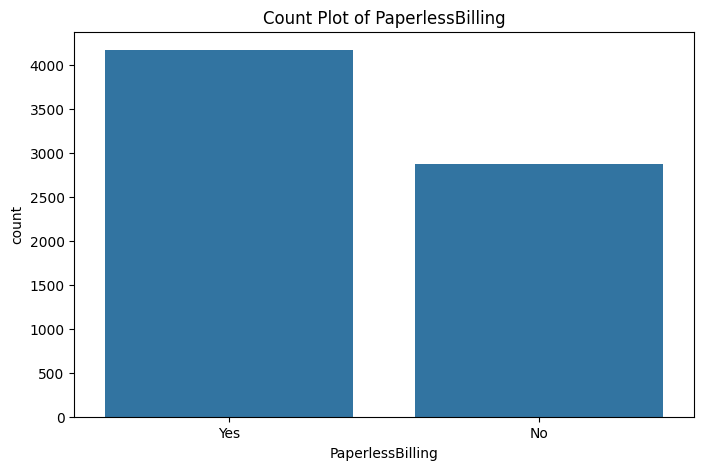

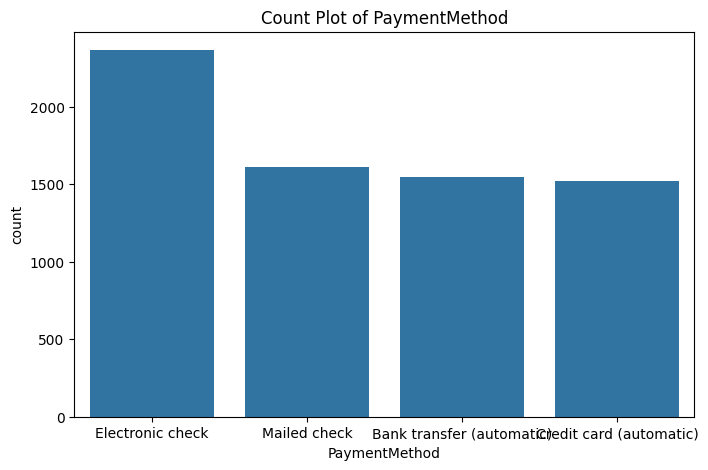

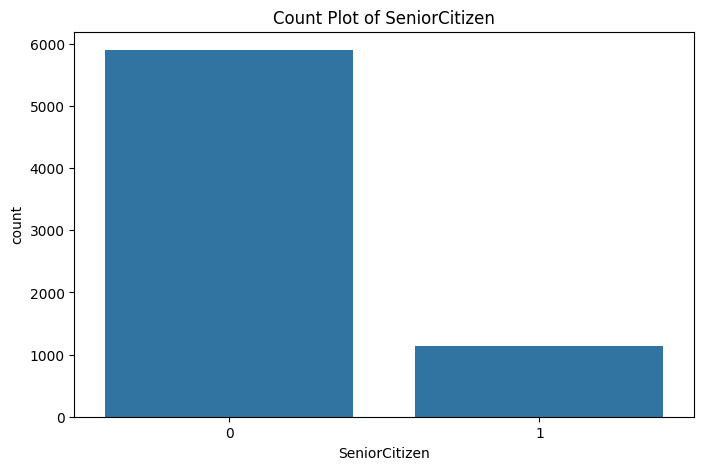

In [ ]:
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'SeniorCitizen'
]
# Loop through each categorical column
for col in categorical_cols:
  plt.figure(figsize=(8, 5))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

**4. Data Preprocessiong**

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

<ipython-input-43-b6eb27bc3ee0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [ ]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [ ]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [ ]:
print(object_columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<Axes: >

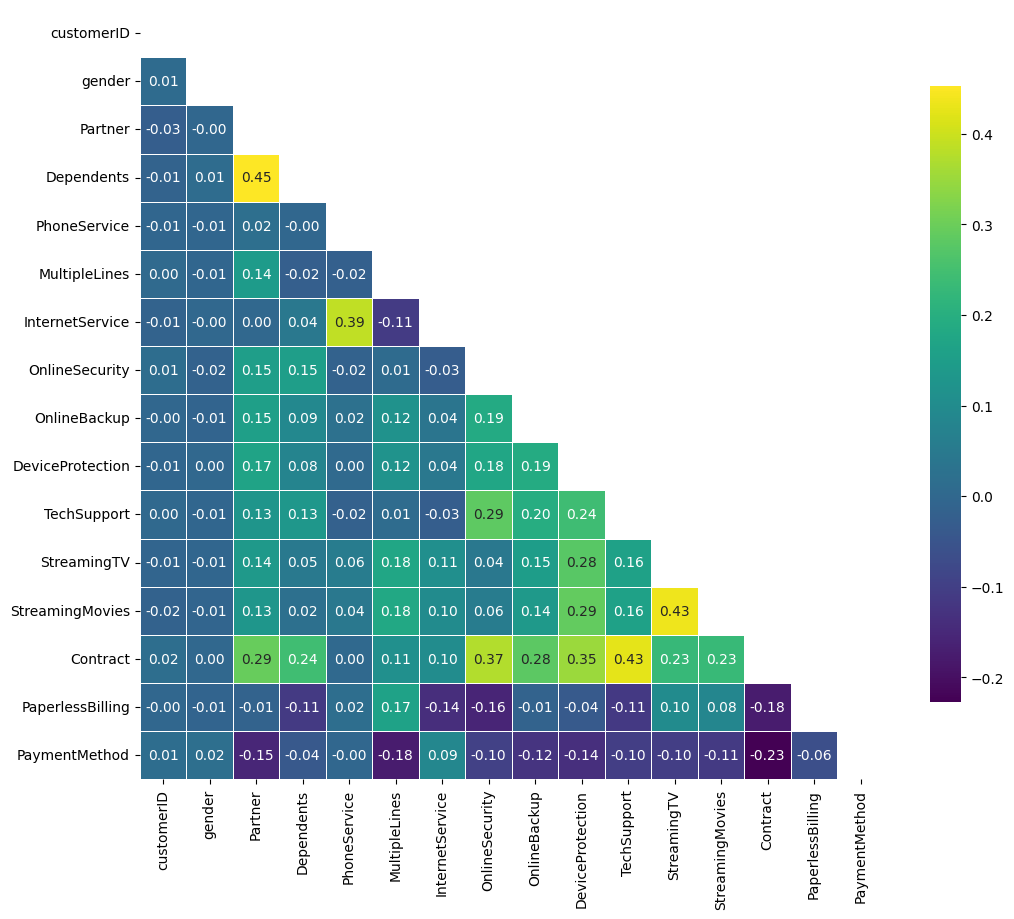

In [ ]:
numerical_cols = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical_df = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()
# Mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Create the heatmap with customization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            mask=mask,  # Apply the mask to hide the upper triangle
            annot=True,
            cmap='viridis',  # Change colormap
            fmt=".2f",
            linewidths=0.5,  # Add lines between cells
            linecolor='white',
            cbar_kws={'shrink': 0.8},  # Adjust colorbar size
            annot_kws={'size': 10})

Traianing and test data split

In [ ]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [ ]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.shape)

(5634,)


In [ ]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


Synthetic Minority Oversampling TEchnique (SMOTE)

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_smote.shape)

(8276,)


In [ ]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


**5. Model Training**

In [ ]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [ ]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")

  # Use eval_metric for XGBoost and scoring for other models
  if model_name == "XGBoost":
    # Pass eval_metric directly to XGBClassifier
    model.set_params(eval_metric='logloss')
  else:
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")

  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.84
----------------------------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.68297101, 0.7081571 , 0.81873112, 0.82779456, 0.83987915]),
 'Random Forest': array([0.73248792, 0.76495468, 0.90755287, 0.89848943, 0.90574018]),
 'XGBoost': array([0.73248792, 0.76495468, 0.90755287, 0.89848943, 0.90574018])}

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


**6. Model Evaluation**

In [ ]:
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7792760823278921
Confsuion Matrix:
 [[875 161]
 [150 223]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1036
           1       0.58      0.60      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

**7. Load the saved  model and  build a Predictive System**

In [ ]:
# load teh saved model and the feature names

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [ ]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [ ]:
print(feature_names)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
input_data = {
    'customerID': 'any_customerID',  # Add a dummy customerID
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)

# Get list of categorical features from the encoders dictionary
categorical_features = list(encoders.keys())

# Exclude numerical features and 'customerID' from encoding
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'customerID'] # Exclude 'customerID'
categorical_features = [col for col in categorical_features if col not in numerical_features]

# Encode only categorical features, excluding 'customerID'
for column in categorical_features:
  if column in input_data_df.columns:  # Check if column exists in input_data_df
    input_data_df[column] = encoders[column].transform(input_data_df[column])

# Ensure the input data has the same columns as the training data, in the same order
input_data_df = input_data_df[feature_names]  # Ensure correct order including 'customerID'


# Instead of encoding 'customerID', assign a default value since it's expected by the model
input_data_df['customerID'] = -1  # Or any other placeholder value

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.72 0.28]]


In [ ]:
encoders

{'customerID': LabelEncoder(),
 'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

**8.Implement hiperparameter tuining**

In [ ]:
importances = best_rfc.feature_importances_
feature_names = X.columns # Get all columns including 'customerID'
importances = importances[1:]
 # Exclude the first element (importance of 'customerID')

feature_importance_df = pd.DataFrame({'Feature': feature_names[1:], 'Importance': importances}) # Exclude 'customerID' from feature_names
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

             Feature  Importance
14          Contract    0.147495
17    MonthlyCharges    0.109296
4             tenure    0.107370
18      TotalCharges    0.095904
8     OnlineSecurity    0.092840
11       TechSupport    0.071486
7    InternetService    0.042499
16     PaymentMethod    0.038307
9       OnlineBackup    0.037876
3         Dependents    0.032232
10  DeviceProtection    0.027936
2            Partner    0.021491
0             gender    0.017571
12       StreamingTV    0.016101
6      MultipleLines    0.015515
13   StreamingMovies    0.015185
15  PaperlessBilling    0.012471
1      SeniorCitizen    0.011193
5       PhoneService    0.006432


**9. Model Selection**

In [ ]:
models = {
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "param_grid": {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "param_grid": {
            'n_estimators': [100, 200],
            'max_depth': [None, 5],  # Reduced options
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, eval_metric='logloss'),
        "param_grid": {
            'n_estimators': [100, 200],
            'max_depth': [3, 5],  # Reduced options
            'learning_rate': [0.1, 0.01]
        }
    }
}

# Perform GridSearchCV or RandomizedSearchCV for each model
best_model = None
best_score = 0

for model_name, model_data in models.items():
    print(f"Training and evaluating {model_name}...")
    model = model_data["model"]
    param_grid = model_data["param_grid"]

    # Use RandomizedSearchCV for faster exploration
    # (but potentially less optimal results)
    if model_name in ["Random Forest", "XGBoost"]:
        search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                     n_iter=5, cv=3, scoring='accuracy',  # Reduced iterations and folds
                                     verbose=1, random_state=42, n_jobs=-1)
    else:  # Use GridSearchCV for Decision Tree (smaller search space)
        search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

    search.fit(X_train_smote, y_train_smote)

    # Evaluate on test data
    y_pred = search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{model_name} - Best parameters: {search.best_params_}")
    print(f"{model_name} - Accuracy: {accuracy:.4f}")
    print("-" * 50)

    if accuracy > best_score:
        best_score = accuracy
        best_model = search.best_estimator_

print(f"Best Model: {best_model.__class__.__name__}")
print(f"Best Accuracy: {best_score:.4f}")

Training and evaluating Decision Tree...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Decision Tree - Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree - Accuracy: 0.7551
--------------------------------------------------
Training and evaluating Random Forest...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Random Forest - Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Random Forest - Accuracy: 0.7793
--------------------------------------------------
Training and evaluating XGBoost...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
XGBoost - Best parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}
XGBoost - Accuracy: 0.7715
--------------------------------------------------
Best Model: RandomForestClassifier
Best Accuracy: 0.7793


Precision: 0.5807291666666666
Recall: 0.5978552278820375
F1-score: 0.5891677675033025
ROC-AUC: 0.7212249112383161


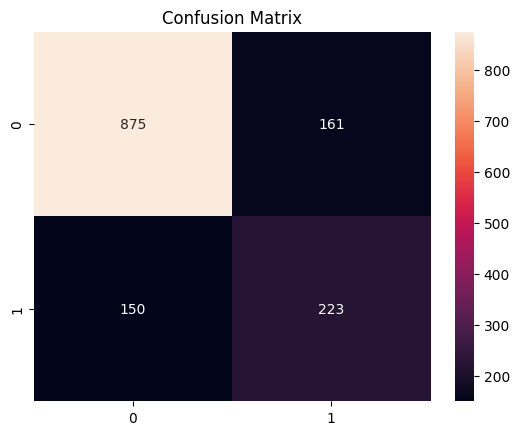

In [ ]:
# 1. Detailed Performance Metrics and Confusion Matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_pred = best_model.predict(X_test)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()



**10.Model Deployment and Monitoring**

In [ ]:
import cProfile
import pstats # Remove extra indentation here

profiler = cProfile.Profile()
profiler.enable()

# Run your Flask app or a specific function

profiler.disable()
stats = pstats.Stats(profiler).sort_stats('cumulative')
stats.print_stats()

         31 function calls in 0.000 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 /usr/lib/python3.11/codeop.py:120(__call__)
        1    0.000    0.000    0.000    0.000 /usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3337(_update_code_co_name)
        1    0.000    0.000    0.000    0.000 /usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3512(run_code)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.compile}
        3    0.000    0.000    0.000    0.000 {built-in method builtins.next}
        1    0.000    0.000    0.000    0.000 {method 'replace' of 'code' objects}
        2    0.000    0.000    0.000    0.000 /usr/lib/python3.11/dis.py:639(findlinestarts)
        1    0.000    0.000    0.000    0.000 /usr/lib/python3.11/contextlib.py:132(__enter__)
        1    0.000    0.000    0.000    0.000 {buil

**11.downsampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=42)  # Set random_state for reproducibility

In [ ]:
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_smote, y_train_smote)

In [ ]:
models = {
   "Random Forest": {
   "model": RandomForestClassifier(random_state=42),
   "param_grid": {
   'n_estimators': [100, 200],
   'max_depth': [None, 5, 10],  # Add more options for max_depth
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
   }
   },
   # ... other models
   }

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Adjust n_splits as needed

In [ ]:
rfc = RandomForestClassifier(random_state=42)
scores = []
for train_index, test_index in skf.split(X_train_smote, y_train_smote):
   X_train_fold, X_test_fold = X_train_smote.iloc[train_index], X_train_smote.iloc[test_index]
   y_train_fold, y_test_fold = y_train_smote.iloc[train_index], y_train_smote.iloc[test_index]

   rfc.fit(X_train_fold, y_train_fold)
   y_pred_fold = rfc.predict(X_test_fold)
   scores.append(accuracy_score(y_test_fold, y_pred_fold))

print(f"Random Forest cross-validation accuracy: {np.mean(scores):.2f}")

Random Forest cross-validation accuracy: 0.85


**12.Data Pipelining**

In [ ]:
from tpot import TPOTClassifier

# Define the TPOT classifier
tpot = TPOTClassifier(generations=1, population_size=50, verbosity=2, random_state=42)

# Fit TPOT to your training data
tpot.fit(X_train_smote, y_train_smote)

# Evaluate the best pipeline on the test data
print(tpot.score(X_test, y_test))

# Export the best pipeline
tpot.export('tpot_churn_pipeline.py')

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.840878322168221

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.5, min_samples_leaf=6, min_samples_split=14, n_estimators=100)
0.7863733144073811


**Conclusion**

1. Goal: Predict customer churn using the Telco dataset and machine learning.
2. EDA & Preprocessing: Explored data, handled missing values, and encoded categorical features.
3. Class Imbalance: Addressed using SMOTE to improve model performance.
4. Model Training: Decision Tree, Random Forest, and XGBoost models were trained and evaluated.
5. Model Selection: Random Forest achieved the highest accuracy.
6. Hyperparameter Tuning: Optimized the model using GridSearchCV/RandomizedSearchCV.
7. Feature Importance: Identified key factors influencing customer churn.
8. Model Deployment: Saved the trained model for real-time prediction.
9. Business Impact: Enables proactive customer retention strategies.
10. Key Findings: SMOTE, feature engineering, and Random Forest were crucial.
11. Future Work: Explore other models, feature engineering techniques, and data augmentation.

**NOTE**: Successfully built a robust churn prediction model with valuable insights.